In [1]:



%reload_ext autoreload
%load_ext autoreload
# %load_ext autoreload
# %autoreload 2
import sys
sys.path.insert(0,'/home/aw1223/ip/agile')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam/neural_lam')

import torch
from sdk.models.graph_lam_data import GraphLAM_DataProcessor
from sdk.models.graph_lam import GraphLam_Model
from neural_lam.weather_dataset import WeatherDataset

%cd /home/aw1223/ip/worktree_a/imports/neural-lam
dataset='meps_example'

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    dataset,
                    pred_length=1,
                    split='test',
                    subsample_step=1,
                ),
                batch_size=1,
                shuffle=False,
                num_workers=1,
            )

data_processor = GraphLAM_DataProcessor(dataset,graph='1level')

graph_data = data_processor.preprocess_inputs(eval_loader)
# print(graph_data)

feature_shape_dict = graph_data['shapes']
edge_index_dict = graph_data['edges']
# print(edge_index_dict)
%cd -

model = GraphLam_Model(feature_shape_dict,edge_index_dict)
# #Change data to a list of inputs
# print(graph_data['features'])

# print('grid_features',graph_data['features']['grid_features'].shape)
# print('mesh_static_features',graph_data['features']['mesh_static_features'].shape)
# print('g2m_features',graph_data['features']['g2m_features'].shape)
# print('m2m_features',graph_data['features']['m2m_features'].shape)
# print('m2g_features',graph_data['features']['m2g_features'].shape)


grid_features = graph_data['features']['grid_features']
mesh_static_features = graph_data['features']['mesh_static_features']
g2m_features = graph_data['features']['g2m_features']
m2m_features = graph_data['features']['m2m_features']
m2g_features = graph_data['features']['m2g_features']
print('grid_features',grid_features.shape)
print('mesh_static_features',mesh_static_features.shape)
print('g2m_features',g2m_features.shape)
print('m2m_features',m2m_features.shape)
print('m2g_features',m2g_features.shape)



g2m_edge_index = graph_data['edges']['g2m_edge_index']
m2m_edge_index = graph_data['edges']['m2m_edge_index']
m2g_edge_index = graph_data['edges']['m2g_edge_index']

# External inputs {'g2m_embedder_input_0': None, 'g2m_gnn_input_2': None, 'grid_embedder_input_0': None, 'm2g_embedder_input_0': None, 'm2g_gnn_input_2': None, 'm2m_embedder_input_0': None, 'mesh_embedder_input_0': None, 'processor_input_2': None}
#Must sort inputs
inputs = [g2m_features,g2m_edge_index,grid_features,m2g_features,m2g_edge_index,m2m_features,mesh_static_features,m2m_edge_index]
# features = [grid_features,mesh_static_features,g2m_features,m2m_features,m2g_features]
# edges = [g2m_edge_index,m2m_edge_index,m2g_edge_index]
# inputs = [features,edges]

# out = model(grid_features =grid_features ,mesh_static_features=mesh_static_features,g2m_features=g2m_features,m2m_features=m2m_features,m2g_features=m2g_features)
out = model(*inputs)
# out = model(*features,*edges)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/aw1223/ip/worktree_a/imports/neural-lam
rempaipng
m2g
g2m
/home/aw1223/ip/agile/sdk
Edges in subgraphs: m2m=98, g2m=156, m2g=156
Loaded graph with 100 nodes (50 grid, 50 mesh)
grid_features torch.Size([50, 54])
mesh_static_features torch.Size([50, 2])
g2m_features torch.Size([156, 3])
m2m_features torch.Size([98, 3])
m2g_features torch.Size([156, 3])
x torch.Size([100, 32])
edge_index torch.Size([2, 156])
rx_node_embed torch.Size([100, 32])
rx_aggregated_edges torch.Size([100, 32])
forward m2m_gnn
x torch.Size([100, 32])
edge_index torch.Size([2, 98])
rx_node_embed torch.Size([100, 32])
rx_aggregated_edges torch.Size([50, 32])
forward m2g_gnn
x torch.Size([150, 32])
edge_index torch.Size([2, 156])
rx_node_embed torch.Size([150, 32])
rx_aggregated_edges torch.Size([100, 32])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Moving model to Ample
Compiling model
model name GraphLam_Model
x torch.Size([100, 32])
edge_index torch.Size([2, 156])
rx_node_embed torch.Size([100, 32])
rx_aggregated_edges torch.Size([100, 32])
forward m2m_gnn
x torch.Size([100, 32])
edge_index torch.Size([2, 98])
rx_node_embed torch.Size([100, 32])
rx_aggregated_edges torch.Size([50, 32])
forward m2g_gnn
x torch.Size([150, 32])
edge_index torch.Size([2, 156])
rx_node_embed torch.Size([150, 32])
rx_aggregated_edges torch.Size([100, 32])
input_to_layer_map {('grid_embedder_input_0', 0): 'grid_embedder', ('g2m_embedder_input_0', 0): 'g2m_embedder', ('m2g_embedder_input_0', 0): 'm2g_embedder', ('mesh_embedder_input_0', 0): 'mesh_embedder', ('grid_embedder_output_0', 0): 'encoding_grid_mlp', ('g2m_gnn_input_1', 1): 'm2g_gnn', ('g2m_embedder_output_0', 2): 'g2m_gnn', ('mesh_embedder_output_0', 3): 'g2m_gnn', ('m2m_embedder_input_0', 0): 'm2m_embedder', ('g2m_gnn_output_0', 0): 'processor', ('processor_input_1', 1): 'processor', ('m2m_em

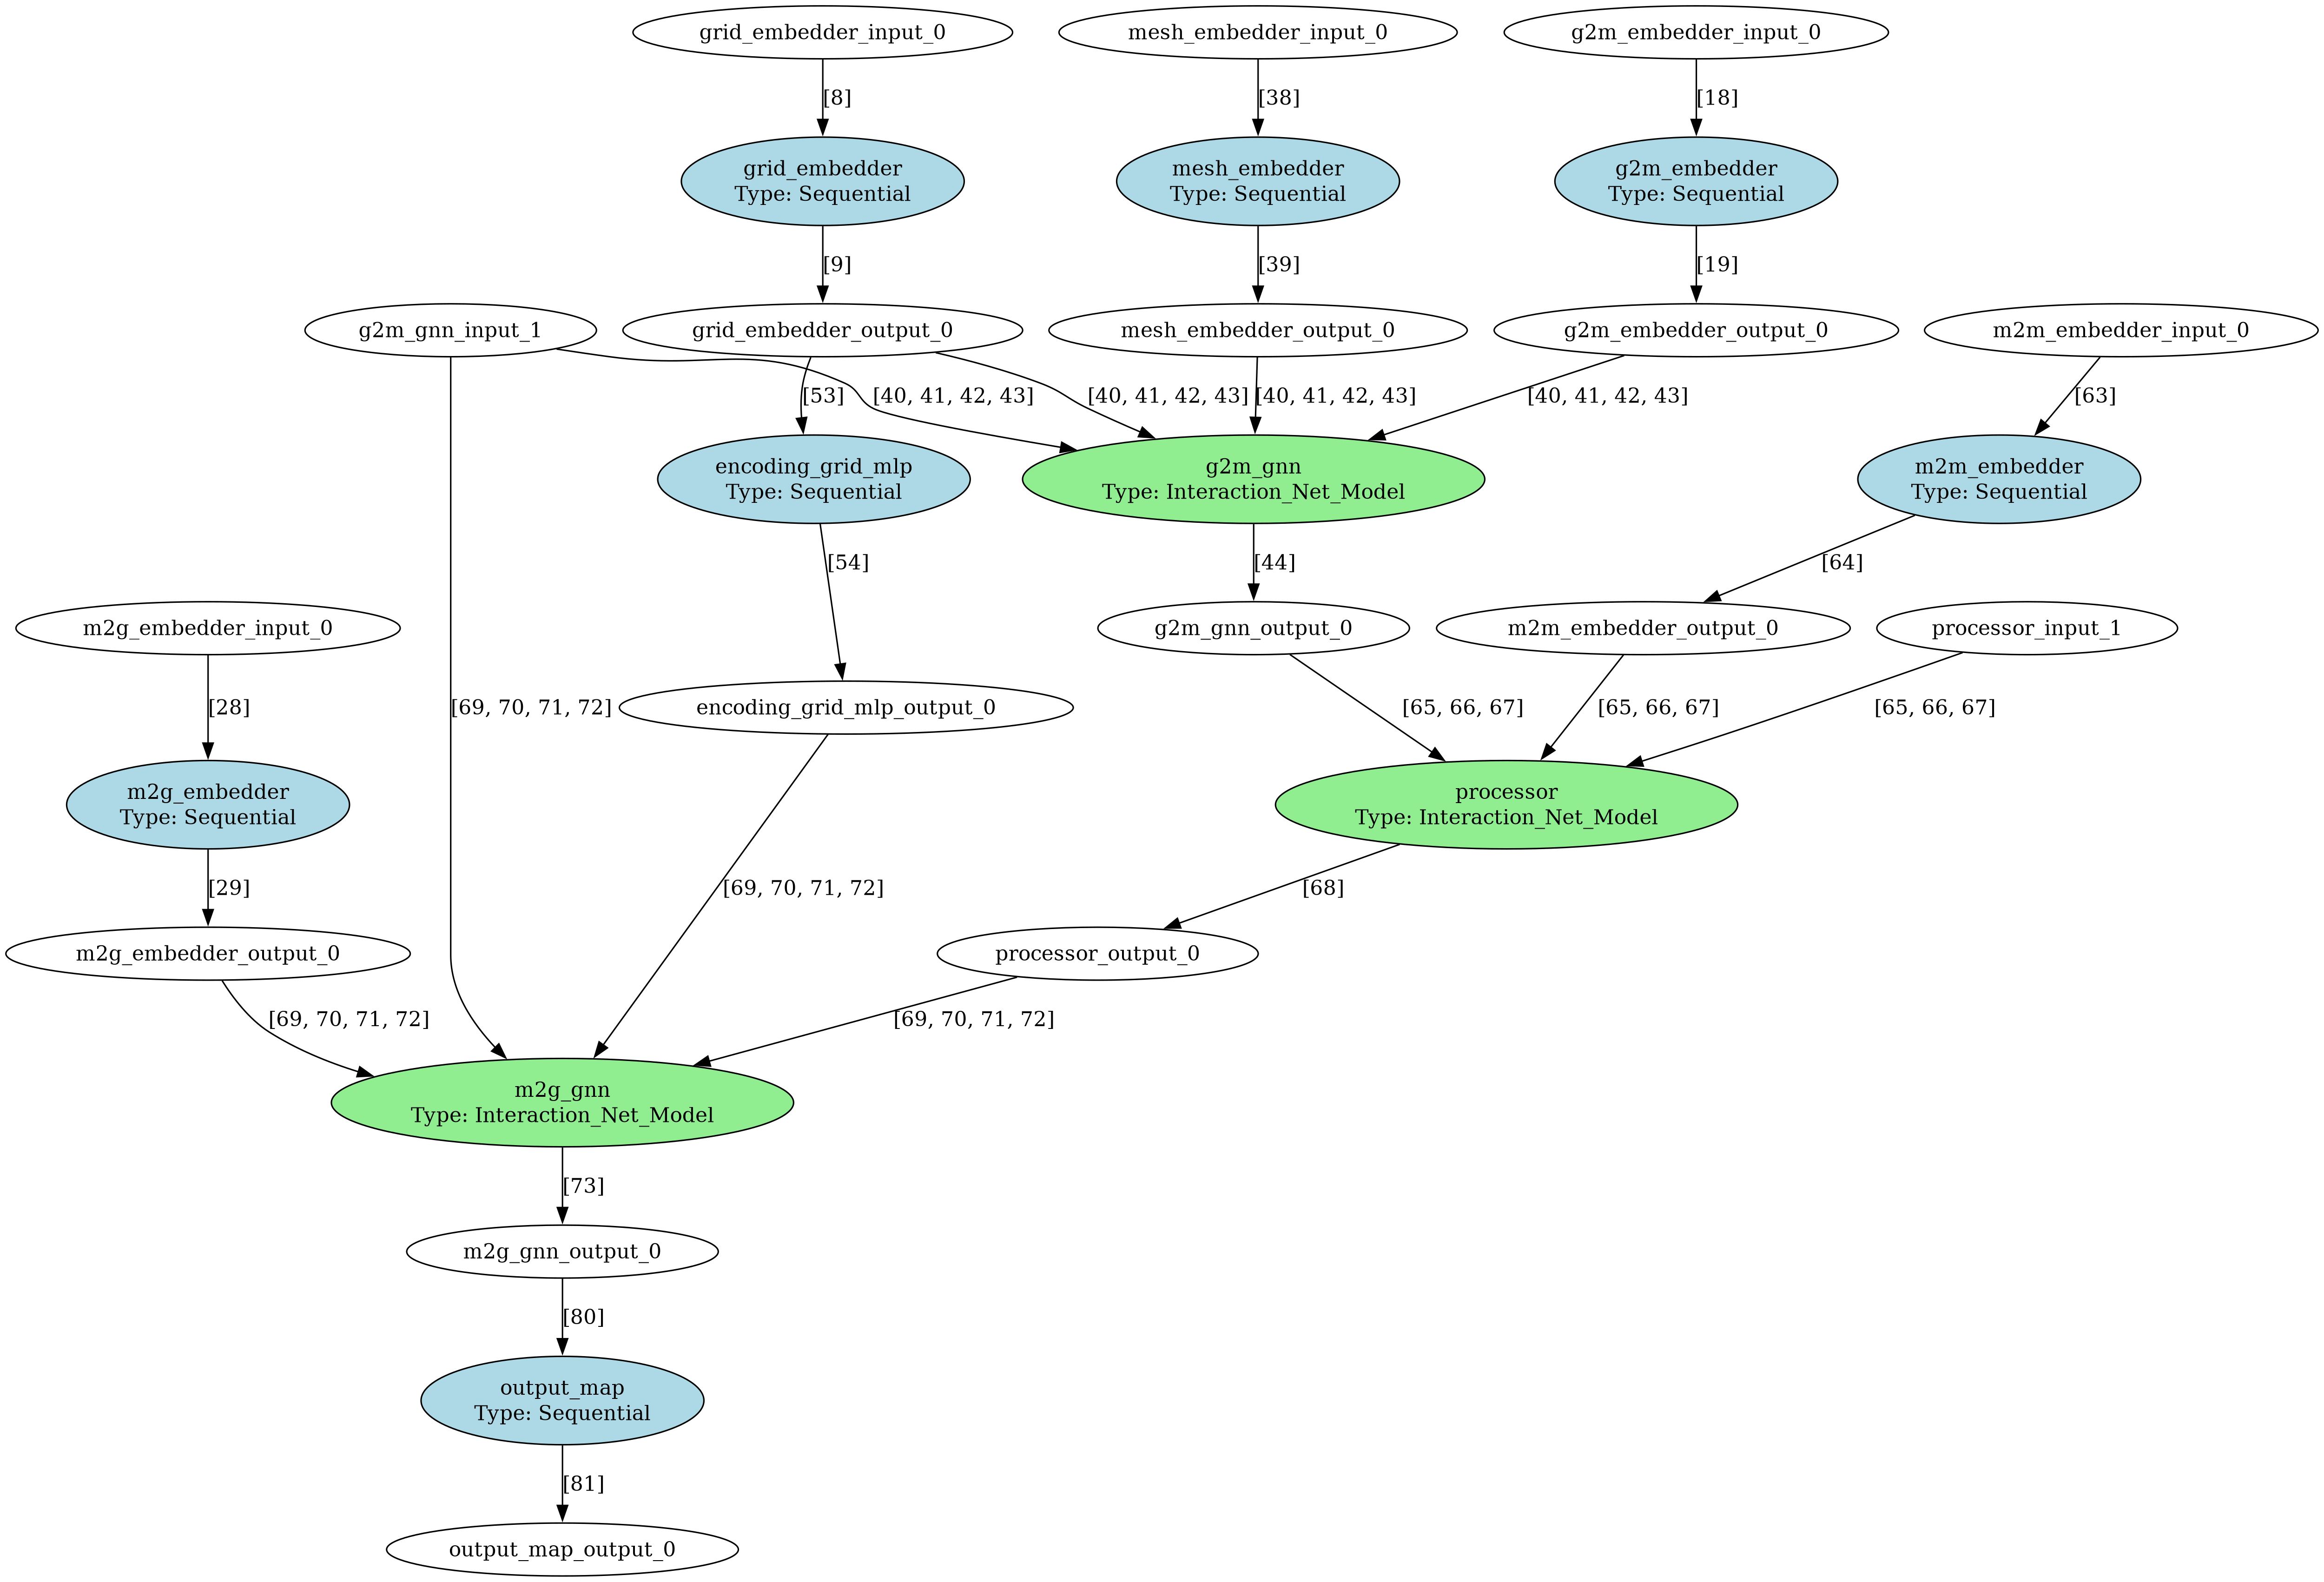

External inputs {'g2m_embedder_input_0': tensor([[ 0.5000, -0.3319, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.3933,  0.1218, -0.3739],
        [ 0.4890, -0.3151, -0.3739],
        [ 0.3842, -0.0882, -0.3739],
        [ 0.3988,  0.1386, -0.3739],
        [ 0.4783, -0.2983, -0.3739],
        [ 0.3807, -0.0714, -0.3739],
        [ 0.4050,  0.1555, -0.3739],
        [ 0.4681, -0.2815, -0.3739],
        [ 0.3779, -0.0546, -0.3739],
        [ 0.4117,  0.1723, -0.3739],
        [ 0.4581, -0.2647, -0.3739],
        [ 0.3758, -0.0378, -0.3739],
        [ 0.4190,  0.1891, -0.3739],
        [ 0.4486, -0.2479, -0.3739],
        [ 0.3745, -0.0210, -0.3739],
        [ 0.4269,  0.2059, -0.3739],
        [ 0.4396, -0.2311, -0.3739],
        [ 0.3740, -0.0042, -0.3739],
        [ 0.4352,  0.2227, -0.3739],
        [ 0.4310, -0.2143, -0.3739],
        [ 0.3741,  0.0126, -0.3739],
        [ 0.4441,  0.2395, -0.3739],
        [ 0.4229, -0.1975, -0.3739],
        [ 0.3751,  0.0294, -0.3739

/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_attr'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


TypeError: arange() received an invalid combination of arguments - got (int, NoneType), but expected one of:
 * (Number end, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, *, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, Number step, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [2]:

%load_ext autoreload
%autoreload 2


from sdk.ample import Ample

ample = Ample()
# model = GraphLam_Model(<parameters>)

model.to_device('ample',data=inputs)
#inputs.to_device('ample')# Change to this when time

# out = model(<input_graph>)